# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# importing data

In [2]:
# Importing dataframe
path = r"C:\Users\User\Downloads\df_cleaned.csv"

In [3]:
# Load the data into a DataFrame
df_cleaned = pd.read_csv(path)

In [34]:
df_cleaned.head()

,incident_id,date,state,n_killed,n_injured,gun_stolen,gun_type,n_guns_involved,n_victims,n_suspects
0,461105,2013-01-01,Pennsylvania,0,4,Unknown,Unknown,0.0,4,1
1,460726,2013-01-01,California,1,3,Unknown,Unknown,0.0,4,1
2,478855,2013-01-01,Ohio,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2.0,3,2
3,478925,2013-01-05,Colorado,4,0,Unknown,Unknown,0.0,3,1
4,478959,2013-01-07,North Carolina,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2.0,3,1


In [35]:
# Display information about the dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   incident_id      239677 non-null  int64         
 1   date             239677 non-null  datetime64[ns]
 2   state            239677 non-null  object        
 3   n_killed         239677 non-null  int64         
 4   n_injured        239677 non-null  int64         
 5   gun_stolen       239677 non-null  object        
 6   gun_type         239677 non-null  object        
 7   n_guns_involved  239677 non-null  float64       
 8   n_victims        239677 non-null  int64         
 9   n_suspects       239677 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 18.3+ MB


In [36]:
df_cleaned.shape

(239677, 10)

In [37]:
df_cleaned.columns

Index(['incident_id', 'date', 'state', 'n_killed', 'n_injured', 'gun_stolen',
       'gun_type', 'n_guns_involved', 'n_victims', 'n_suspects'],
      dtype='object')

### Creating subset

In [38]:
# Retain only 'date' and 'n_killed' columns
df_cleaned = df_cleaned[['date', 'n_killed']]

In [39]:
# Verify the result
df_cleaned.head()

,date,n_killed
0,2013-01-01,0
1,2013-01-01,1
2,2013-01-01,1
3,2013-01-05,4
4,2013-01-07,2


In [40]:
# Set the 'date' column as the index
df_cleaned.set_index('date', inplace=True)

In [41]:
df_cleaned.head()

,n_killed
date,
2013-01-01,0
2013-01-01,1
2013-01-01,1
2013-01-05,4
2013-01-07,2


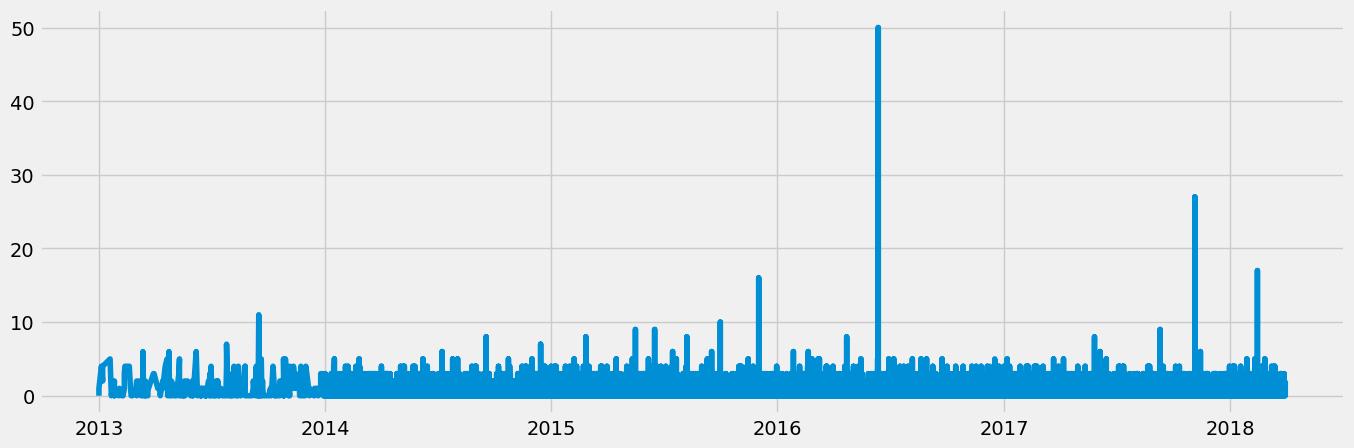

In [44]:
# Plot the data
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(df_cleaned)

I focus on selecting data from a relevant historical range, excluding periods with anomalies, external shocks, or irregular patterns that could bias results. Forecasted or synthetic data is also removed to ensure the analysis is based on actual observed values, preserving the integrity of the time series insights

### Time-series analysis: decomposition

In [50]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [51]:
# Decompose the data's components
decomposition = sm.tsa.seasonal_decompose(df_cleaned['n_killed'], model='additive', period=365)

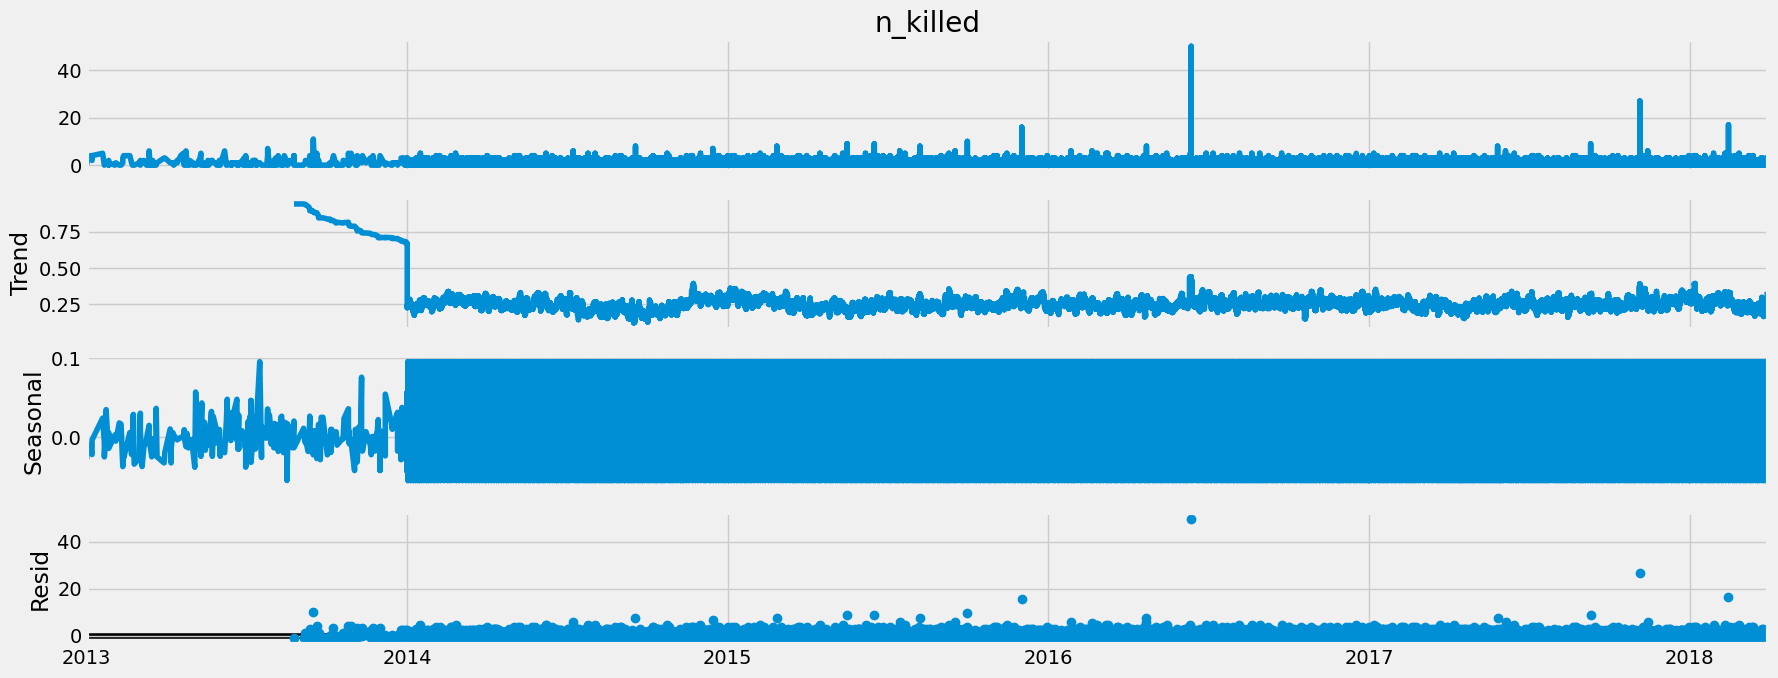

In [52]:
# Plot the separated components
rcParams['figure.figsize'] = 18, 7
decomposition.plot()
plt.show()

The time series analysis of n_killed reveals occasional spikes indicating significant incidents. The trend component shows an initial decline followed by stabilization, suggesting a reduction or fluctuation in reporting over time. The seasonal component exhibits a consistent pattern, though its impact is relatively small. The residual component captures random noise, with notable spikes aligning with extreme values in the original series, indicating potential anomalies or outlier events.

### Testing for stationarity

In [53]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def dickey_fuller(timeseries): 
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    print(result)

# Apply the test on the time series
dickey_fuller(df_cleaned['n_killed'])

Dickey-Fuller Stationarity Test:
Test Statistic                    -47.537863
p-value                             0.000000
Number of Lags Used                82.000000
Number of Observations Used    239594.000000
Critical Value (1%)                -3.430377
Critical Value (5%)                -2.861552
Critical Value (10%)               -2.566776
dtype: float64


The Dickey-Fuller test was conducted to check for stationarity, with the null hypothesis (H₀) stating that the time series has a unit root (non-stationary). The test statistic of -47.54 is significantly lower than the critical values at 1% (-3.43), 5% (-2.86), and 10% (-2.56) significance levels, and the p-value is effectively 0. Since the p-value is far below 0.05, we reject the null hypothesis, confirming that the time series is stationary and does not require differencing for further time series modeling.

### Check for autocorrelations

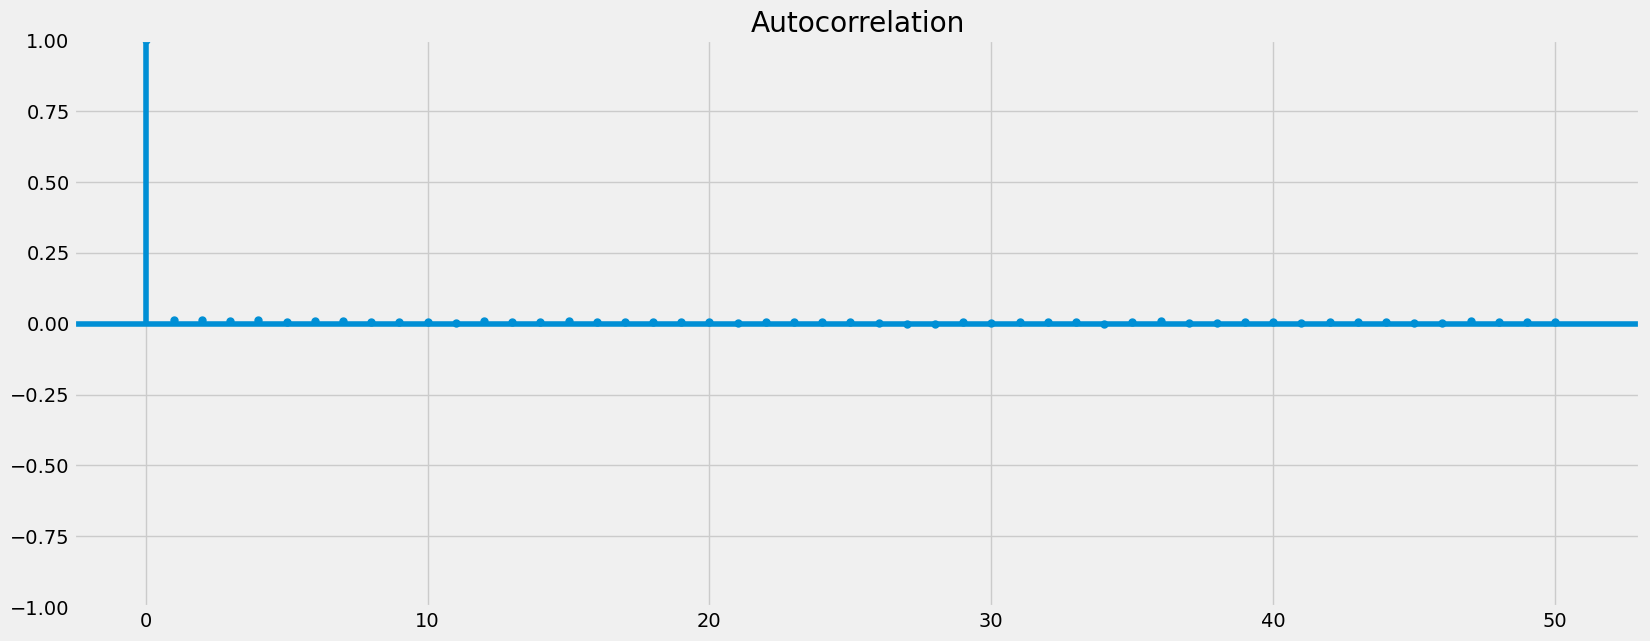

In [55]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot the autocorrelation function (ACF)
plot_acf(df_cleaned['n_killed'], lags=50)  # Adjust lags as needed
plt.show()